Process:

1. [Case Study](#intro)
2. [Import Libraries](#importlib)
3. [Get data](#getdata)
4. [Cleaning/Wrangling/EDA](#cleaning)
    1. [Cleaning Dataframe data_rent](#)
    2. [Cleaning Dataframe data_buy](#)
    3. [Merge data_rent and data_buy](#)
    4. [Mortgage-calculator](#)
5. [Store into SQL](#)
6. [Store in .csv file](#)
7. [reread the file from SQL](#)
8. [Hypothesis Testing](#)


<a id='intro'></a>
## 1. Case Study

Goal:
The goal is to analyze the real estate market in the city of zurich in order to be able to make a decision wether for certain criterias (rooms, location) it is better to buy or rent an apartment.

Two datasets were imported:
- Imported as data_rent: *Mietpreise in der Stadt Zürich 2022*. Dataset with the estimated rental prices of the city of zurich for april 2022. The data collection was done in a bilayer-modell and based on an automized Data collection from the city institution (Sample 1) and an additionnal randomly selected sample (Sample 2). The data is only focussing on 2, 3 and 4 room apartments making 80% of the total rental apartments of zurich. The dataset is filled with aggregated data. This data collection was done last in 2006.

- Imported as data_buy: *Liegenschaften-Markt Stadt Zürich seit 2008*. Aggregated dataset with the prices of sold apartments and houses since 2008. Different prices per square meter are evaluated (7 in total), where only the price of apartments per square meter apartment surface (FrQmWohnflStwE) is of interest to us.


<a id='importlib'></a>
## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='getdata_2022'></a>
## 3. Get data

In [2]:
data_rent = pd.read_csv('BAU516OD5161-Mietpreise in der Stadt Zürich 2022.csv')

display(data_rent.shape)
data_rent
# more information on dataset:
# https://data.stadt-zuerich.ch/dataset/bau_whg_mpe_mietpreis_raum_zizahl_gn_jahr_od5161

(1896, 35)

,StichtagDatJahr,StichtagDatMonat,RaumeinheitSort,RaumeinheitLang,GliederungSort,GliederungLang,ZimmerSort,ZimmerLang,GemeinnuetzigSort,GemeinnuetzigLang,...,qu50u,qu75,qu75l,qu75u,qu90,qu90l,qu90u,Domain,Sample1,Sample2
0,2022,2022.04,1,Ganze Stadt,0,Ganze Stadt,2,2 Zimmer,0,Alle Wohnungen,...,1360.00,1712.00,1690.00,1750.00,2155.00,2120.00,2200.00,46692,13488,1714
1,2022,2022.04,1,Ganze Stadt,1,Neubau bis 2 Jahre,2,2 Zimmer,0,Alle Wohnungen,...,2080.00,2227.00,2080.00,2380.00,2490.00,2273.00,2914.00,1498,488,60
2,2022,2022.04,1,Ganze Stadt,2,Neubezug bis 2 Jahre,2,2 Zimmer,0,Alle Wohnungen,...,1560.00,1960.00,1900.00,2040.00,2350.00,2319.00,2449.00,13182,3066,473
3,2022,2022.04,1,Ganze Stadt,3,Bestand Mietverträge 2–10 Jahre,2,2 Zimmer,0,Alle Wohnungen,...,1405.00,1701.00,1682.00,1758.00,2099.00,2036.00,2160.00,20055,5902,753
4,2022,2022.04,1,Ganze Stadt,4,Bestand Mietverträge 11-20 Jahre,2,2 Zimmer,0,Alle Wohnungen,...,1160.00,1313.00,1267.00,1390.00,1650.00,1532.00,1819.00,6782,2343,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,2022,2022.04,4,Quartiere,115,Oerlikon,4,4 Zimmer,0,Alle Wohnungen,...,21.33,23.40,22.60,25.19,29.03,25.36,31.52,2132,721,61
1892,2022,2022.04,4,Quartiere,119,Seebach,4,4 Zimmer,0,Alle Wohnungen,...,20.08,23.58,22.43,24.38,27.34,24.91,30.74,2444,993,82
1893,2022,2022.04,4,Quartiere,121,Saatlen,4,4 Zimmer,0,Alle Wohnungen,...,15.59,17.13,16.88,17.45,20.07,20.00,20.42,1161,654,34
1894,2022,2022.04,4,Quartiere,122,Schwamendingen-Mitte,4,4 Zimmer,0,Alle Wohnungen,...,19.02,20.47,19.49,23.08,26.44,22.49,30.18,814,248,54


In [3]:
data_buy = pd.read_csv('BAU514OD5142.csv')

display(data_buy.shape)
data_buy

# https://data.stadt-zuerich.ch/dataset/bau_hae_lima_preise_anzahl_hae_art_gebiet_bzo_jahr_grpd_od5142

(4256, 13)

,Typ,QuarCd,QuarLang,ZoneSort,ZoneLang,Jahr,FrQmBodenGanzeLieg,FrQmBodenStwE,FrQmBodenAlleHA,FrQmBodenNettoGanzeLieg,FrQmBodenNettoStwE,FrQmBodenNettoAlleHA,FrQmWohnflStwE
0,Preis,11,Rathaus,102,Kernzonen,2021,29752,40765,38928,20520,25342,24220,17860
1,Preis,11,Rathaus,102,Kernzonen,2020,.,52797,52797,.,35773,35773,18000
2,Preis,11,Rathaus,102,Kernzonen,2019,44766,44343,44554,29201,27261,28231,12860
3,Preis,11,Rathaus,102,Kernzonen,2018,33364,63887,44428,16493,39152,32613,17530
4,Preis,11,Rathaus,102,Kernzonen,2017,40753,51776,45015,13981,23259,19263,14180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,Zahl,123,Hirzenbach,114,Wohnzone 5,2012,NaN,NaN,NaN,NaN,NaN,NaN,1–3
4252,Zahl,123,Hirzenbach,114,Wohnzone 5,2011,NaN,NaN,NaN,NaN,NaN,NaN,1–3
4253,Zahl,123,Hirzenbach,114,Wohnzone 5,2010,NaN,NaN,NaN,NaN,NaN,NaN,6-8
4254,Zahl,123,Hirzenbach,114,Wohnzone 5,2009,NaN,NaN,NaN,NaN,NaN,NaN,4


<a id='cleaning'></a>
## 4. Cleaning/Wrangling/EDA

### 1. Cleaning/Wrangling Dataframe Data_rent

data_rent clean/drop columns:
- drop columns:
    - StichtagDatMonat and StichtagDatJahr --> same info for all rows.  
    - Drop either Sort (Text) <> Lang (ordinal encoded)
    - drop all the quantiles, meanl, meanu, Domain, Sample1, Sample2 --> not relevant for the analysis.
- for further analysis maybe keep only apartments that are not geminnützig ?!

data_rent headers rename in english:
- Raumeinheit = Ganze Stadt, Stadtkreise, Quartiergruppen, Quartiere
- Gliederung = Additional Data --> Contract situation, City quartier
- Zimmer = Rooms
- GemeinnuetzigLang = Zu den gemeinnützigen gehören zunächst alle Wohnungen, die im Besitz der Stadt oder von Genossenschaften, Vereinen oder Stiftungen sind und nach dem Grundsatz der Kostenmiete bewirtschaftet werden.

data_rent wrangling data in column "Gliederung":
- Data with "Kreis" new column with 'city_borough'
- Data with location "Höngg, Schwamendingen-Mitte, Oberstrass etc." new column with 'city_neighbourhood' information.
- Data with "Neubezug bis 2 Jahre", "Bestand Mietverträge 2–10 Jahre", "Bestand Mietverträge über 20 Jahre" --> new column with rental contract information

filter and store under new dataframe: data_rent_sqm:
- only interested in netto rental prices --> filter only by "Netto" prices, then drop the column
- only interested in square meter rental prices --> filter only by "Quadratmeter"
- only interested in level of details "city_neighbourhoods"

In [4]:
data_rent.columns

Index(['StichtagDatJahr', 'StichtagDatMonat', 'RaumeinheitSort',
       'RaumeinheitLang', 'GliederungSort', 'GliederungLang', 'ZimmerSort',
       'ZimmerLang', 'GemeinnuetzigSort', 'GemeinnuetzigLang', 'EinheitSort',
       'EinheitLang', 'PreisartSort', 'PreisartLang', 'mean', 'meanl', 'meanu',
       'qu10', 'qu10l', 'qu10u', 'qu25', 'qu25l', 'qu25u', 'qu50', 'qu50l',
       'qu50u', 'qu75', 'qu75l', 'qu75u', 'qu90', 'qu90l', 'qu90u', 'Domain',
       'Sample1', 'Sample2'],
      dtype='object')

In [5]:
# dropping columns that are not needed:
data_rent = data_rent.drop(columns=['StichtagDatMonat', 'StichtagDatJahr','RaumeinheitSort','GliederungSort','ZimmerLang','GemeinnuetzigSort','EinheitSort', 'PreisartSort','qu10', 'qu10l', 'qu10u', 'qu25', 'qu25l', 'qu25u', 'qu50l',
       'qu50u', 'qu75', 'qu75l', 'qu75u', 'qu90', 'qu90l', 'qu90u','meanl','meanu','Domain','Sample1','Sample2'], axis=1)

In [6]:
#Checking the columns RaumeinheitLang and GLiederungLang
display(data_rent['RaumeinheitLang'].value_counts())
data_rent['GliederungLang'].value_counts()

Quartiergruppen    792
Stadtkreise        468
Quartiere          420
Ganze Stadt        216
Name: RaumeinheitLang, dtype: int64

Ganze Stadt                           120
Kreis 1                                72
Kreis 2                                72
Kreis 5                                72
Kreis 8                                72
Sihlfeld                               48
Hirzenbach                             48
Seebach                                48
Oerlikon                               48
Affoltern                              48
Wipkingen                              48
Altstetten                             48
Albisrieden                            48
Oberstrass                             48
Unterstrass                            48
Hard                                   48
Höngg                                  48
Kreis 12                               36
Kreis 4                                36
Kreis 11                               36
Saatlen und Schwamendingen-Mitte       36
Neubezug bis 2 Jahre                   36
Bestand Mietverträge 2–10 Jahre        36
Bestand Mietverträge über 20 Jahre

In [8]:
#Adding the information of the city_Boroughs to the dataset
Kreis_1 = ['Rathaus', 'Hochschulen', 'Lindenhof', 'City']
Kreis_2 = ['Wollishofen', 'Leimbach', 'Enge' ]
Kreis_3 = ['Alt-Wiedikon', 'Friesenberg', 'Sihlfeld']
Kreis_4 = ['Werd', 'Langstrasse', 'Hard']
Kreis_5 = ['Gewerbeschule', 'Escher Wyss']
Kreis_6 = ['Unterstrass', 'Oberstrass']
Kreis_7 = ['Fluntern', 'Hottingen', 'Hirslanden', 'Witikon']
Kreis_8 = ['Seefeld', 'Mühlebach', 'Weinegg']
Kreis_9 = ['Albisrieden', 'Altstetten']
Kreis_10 = ['Höngg', 'Wipkingen']
Kreis_11 = ['Affoltern', 'Oerlikon', 'Seebach']
Kreis_12 = ['Saatlen', 'Schwamendingen-Mitte', 'Hirzenbach']

In [9]:
# in the column GLiederungLang Information are sometimes as city_neighbourhoods / City_boroughs / contract information
#add new column city_borough with city_borough information based on either the Kreis or the city_neighbourhood
data_rent['city_borough']= pd.np.where(data_rent.GliederungLang.str.contains('Kreis '),data_rent.GliederungLang.str.replace('Kreis ',''),
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_1)),1,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_2)),2,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_3)),3,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_4)),4,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_5)),5,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_6)),6,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_7)),7,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_8)),8,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_9)),9,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_10)),10,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_11)),11,
                    pd.np.where(data_rent.GliederungLang.str.contains('|'.join(Kreis_12)),12,
                    pd.np.where(data_rent.GliederungLang.str.contains('Ganze Stadt'),100,0))))))))))))))
data_rent['city_borough']=data_rent.city_borough.astype(int)
data_rent

,RaumeinheitLang,GliederungLang,ZimmerSort,GemeinnuetzigLang,EinheitLang,PreisartLang,mean,qu50,city_borough
0,Ganze Stadt,Ganze Stadt,2,Alle Wohnungen,Wohnung,Netto,1423.00,1336.00,100
1,Ganze Stadt,Neubau bis 2 Jahre,2,Alle Wohnungen,Wohnung,Netto,1847.00,1950.00,0
2,Ganze Stadt,Neubezug bis 2 Jahre,2,Alle Wohnungen,Wohnung,Netto,1612.00,1523.00,0
3,Ganze Stadt,Bestand Mietverträge 2–10 Jahre,2,Alle Wohnungen,Wohnung,Netto,1444.00,1377.00,0
4,Ganze Stadt,Bestand Mietverträge 11-20 Jahre,2,Alle Wohnungen,Wohnung,Netto,1165.00,1143.00,0
...,...,...,...,...,...,...,...,...,...
1891,Quartiere,Oerlikon,4,Alle Wohnungen,Quadratmeter,Brutto,20.69,20.00,11
1892,Quartiere,Seebach,4,Alle Wohnungen,Quadratmeter,Brutto,20.02,19.54,11
1893,Quartiere,Saatlen,4,Alle Wohnungen,Quadratmeter,Brutto,15.29,15.10,12
1894,Quartiere,Schwamendingen-Mitte,4,Alle Wohnungen,Quadratmeter,Brutto,18.28,17.88,12


In [10]:
data_rent['city_borough'].value_counts()

0      180
11     180
7      156
3      144
4      144
12     144
6      132
9      132
10     132
100    120
1      120
2      108
8      108
5       96
Name: city_borough, dtype: int64

In [11]:
# checking the dataset with city_borough = 0 --> its the contractual information
data_rent.loc[(data_rent['city_borough'] == 0)].GliederungLang.value_counts()

Neubau bis 2 Jahre                    36
Neubezug bis 2 Jahre                  36
Bestand Mietverträge 2–10 Jahre       36
Bestand Mietverträge 11-20 Jahre      36
Bestand Mietverträge über 20 Jahre    36
Name: GliederungLang, dtype: int64

In [12]:
#adding new column where rental information from "GliederungLang is stored"
data_rent['rental_contract'] = pd.np.where((data_rent['city_borough'] == 0),data_rent.GliederungLang,0)

In [13]:
#adding new column where city_neighbourhood from 'GliederungLang' is stored
data_rent['city_neighbourhood'] = pd.np.where((data_rent['RaumeinheitLang'] == 'Quartiere'),data_rent.GliederungLang,0)

In [14]:
#keeping only the rent in square meters
data_rent_sqm = data_rent.loc[(data_rent['EinheitLang'] == 'Quadratmeter')&(data_rent['PreisartLang'] == 'Netto')]
data_rent_sqm = data_rent_sqm.drop(columns={'PreisartLang', 'EinheitLang'})

In [16]:
#rename column names
data_rent_sqm=data_rent_sqm.rename(columns={
                            'RaumeinheitLang':'degree_of_detail',
                            'ZimmerSort':'number_rooms',
                            'GemeinnuetzigLang':'community_apartment',
                            'EinheitLang':'price_unit',
                            'Quartiere':'city_neighbourhood',
                            'qu50':'median_rent',
                            'mean':'mean_rent',
                            }).drop(columns={'GliederungLang'})
data_rent_sqm

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood
54,Ganze Stadt,2,Alle Wohnungen,24.87,23.80,100,0,0
55,Ganze Stadt,2,Alle Wohnungen,29.78,31.24,0,Neubau bis 2 Jahre,0
56,Ganze Stadt,2,Alle Wohnungen,28.54,27.73,0,Neubezug bis 2 Jahre,0
57,Ganze Stadt,2,Alle Wohnungen,25.07,24.66,0,Bestand Mietverträge 2–10 Jahre,0
58,Ganze Stadt,2,Alle Wohnungen,20.59,19.77,0,Bestand Mietverträge 11-20 Jahre,0
...,...,...,...,...,...,...,...,...
1681,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon
1682,Quartiere,4,Alle Wohnungen,18.05,17.47,11,0,Seebach
1683,Quartiere,4,Alle Wohnungen,13.77,13.67,12,0,Saatlen
1684,Quartiere,4,Alle Wohnungen,16.20,16.31,12,0,Schwamendingen-Mitte


In [18]:
#Check for duplicates and remove them
display(sum(data_rent_sqm.duplicated())) #check how many rows are duplicated.
data_rent_sqm

0

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood
54,Ganze Stadt,2,Alle Wohnungen,24.87,23.80,100,0,0
55,Ganze Stadt,2,Alle Wohnungen,29.78,31.24,0,Neubau bis 2 Jahre,0
56,Ganze Stadt,2,Alle Wohnungen,28.54,27.73,0,Neubezug bis 2 Jahre,0
57,Ganze Stadt,2,Alle Wohnungen,25.07,24.66,0,Bestand Mietverträge 2–10 Jahre,0
58,Ganze Stadt,2,Alle Wohnungen,20.59,19.77,0,Bestand Mietverträge 11-20 Jahre,0
...,...,...,...,...,...,...,...,...
1681,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon
1682,Quartiere,4,Alle Wohnungen,18.05,17.47,11,0,Seebach
1683,Quartiere,4,Alle Wohnungen,13.77,13.67,12,0,Saatlen
1684,Quartiere,4,Alle Wohnungen,16.20,16.31,12,0,Schwamendingen-Mitte


In [19]:
#keep only the city_neighbourhood degree of detail
data_rent_sqm = data_rent_sqm.loc[(data_rent_sqm['degree_of_detail'] == 'Quartiere')]

In [20]:
data_rent_sqm.dtypes

degree_of_detail        object
number_rooms             int64
community_apartment     object
mean_rent              float64
median_rent            float64
city_borough             int64
rental_contract         object
city_neighbourhood      object
dtype: object

### Cleaning/Wrangling Dataframe Data_buy

data_buy clean/drop columns:
- drop columns:
    - All price columns relative to the land price (FrQmBoden), we keep only our target value
    - QuarCd: is the number relative to the city_neighbourhood, which we already have in "QuarLang"
    - the Zones (zoning of the land) are only relevant for the land prices since we are not interested in them we can drop the columns as well. --> this results in a lot of duplicated rows. the duplicated rows are then dropped.

- drop rows / filter:
    - keeping only Data from 202 on: There was a revision of the zoning law in 2018 + only interested in actual prices!
    - only keeping Typ "Preis" (Median price), the Typ "Zahl" represents how many times it was sold. --> after this we can drop the column "Typ" since we do not get any additional data.

- data_buy wrangling data:
    - Data with "QuarLang" new column with 'city_borough' --> same as in data_rent.
    - convert FrQmWohnflStwE to integers
    - "Hochschulen", "Lindenhof" and "City" are the city_neighbourhoods with the smallest amount of population in Zurich (respectively 675, 1010 and 829 people (Wikipedia: 31.Dez.2020)). Since these are neighbourhoods with mainly university buildings and offices, it makes sense, that we do not have a lot of data regarding the selling of apartments. We use the price of "Rathaus" for all three of them.


In [21]:
data_buy

,Typ,QuarCd,QuarLang,ZoneSort,ZoneLang,Jahr,FrQmBodenGanzeLieg,FrQmBodenStwE,FrQmBodenAlleHA,FrQmBodenNettoGanzeLieg,FrQmBodenNettoStwE,FrQmBodenNettoAlleHA,FrQmWohnflStwE
0,Preis,11,Rathaus,102,Kernzonen,2021,29752,40765,38928,20520,25342,24220,17860
1,Preis,11,Rathaus,102,Kernzonen,2020,.,52797,52797,.,35773,35773,18000
2,Preis,11,Rathaus,102,Kernzonen,2019,44766,44343,44554,29201,27261,28231,12860
3,Preis,11,Rathaus,102,Kernzonen,2018,33364,63887,44428,16493,39152,32613,17530
4,Preis,11,Rathaus,102,Kernzonen,2017,40753,51776,45015,13981,23259,19263,14180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,Zahl,123,Hirzenbach,114,Wohnzone 5,2012,NaN,NaN,NaN,NaN,NaN,NaN,1–3
4252,Zahl,123,Hirzenbach,114,Wohnzone 5,2011,NaN,NaN,NaN,NaN,NaN,NaN,1–3
4253,Zahl,123,Hirzenbach,114,Wohnzone 5,2010,NaN,NaN,NaN,NaN,NaN,NaN,6-8
4254,Zahl,123,Hirzenbach,114,Wohnzone 5,2009,NaN,NaN,NaN,NaN,NaN,NaN,4


In [62]:
# drop some rows and columns
data_buy = data_buy.drop(columns={'FrQmBodenGanzeLieg', 'FrQmBodenStwE', 'FrQmBodenAlleHA', 'FrQmBodenNettoGanzeLieg','FrQmBodenNettoStwE', 'FrQmBodenNettoAlleHA','QuarCd','ZoneLang', 'ZoneSort'})
data_buy = data_buy.loc[(data_buy['Typ'] == 'Preis')]
data_buy = data_buy.drop(columns={'Typ'})

KeyError: "['FrQmBodenNettoGanzeLieg', 'FrQmBodenAlleHA', 'QuarCd', 'FrQmBodenNettoStwE', 'ZoneLang', 'ZoneSort', 'FrQmBodenStwE', 'FrQmBodenGanzeLieg', 'FrQmBodenNettoAlleHA'] not found in axis"

In [23]:
# checking city-neighbourhoods values
data_buy.QuarLang.value_counts()

Wollishofen             112
Oerlikon                 98
Hottingen                98
Enge                     98
Alt-Wiedikon             98
Altstetten               98
Albisrieden              84
Seebach                  84
Mühlebach                84
Unterstrass              84
Escher Wyss              70
Hirslanden               70
Weinegg                  70
Wipkingen                70
Affoltern                70
Sihlfeld                 70
Leimbach                 70
Schwamendingen-Mitte     70
Höngg                    56
Saatlen                  56
Fluntern                 56
Hirzenbach               56
Witikon                  56
Oberstrass               56
Seefeld                  42
Gewerbeschule            42
Hard                     42
Friesenberg              42
Hochschulen              28
Langstrasse              28
City                     28
Werd                     14
Lindenhof                14
Rathaus                  14
Name: QuarLang, dtype: int64

In [24]:
# new column with city-boroughs similar to data_rent
data_buy['city_borough']= pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_1)),1,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_2)),2,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_3)),3,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_4)),4,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_5)),5,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_6)),6,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_7)),7,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_8)),8,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_9)),9,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_10)),10,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_11)),11,
                    pd.np.where(data_buy.QuarLang.str.contains('|'.join(Kreis_12)),12,0))))))))))))
data_buy['city_borough']=data_buy.city_borough.astype(int)
data_buy

,QuarLang,Jahr,FrQmWohnflStwE,city_borough
0,Rathaus,2021,17860,1
1,Rathaus,2020,18000,1
2,Rathaus,2019,12860,1
3,Rathaus,2018,17530,1
4,Rathaus,2017,14180,1
...,...,...,...,...
4237,Hirzenbach,2012,6100,12
4238,Hirzenbach,2011,6370,12
4239,Hirzenbach,2010,6290,12
4240,Hirzenbach,2009,5630,12


Because the Buying prices are from 2019 - 2021, we do not have any data for 2022 but are comparing it to the 2022 rental prices. We need to estimate the buying prices for 2022 using the inflation adjustment. Value of Index in 2022 = Price of Market 2022/ Price of Market 2021 * Value of Index in 2021.

In [25]:
# average consumer price inflation rate for 2022: inflation 2021/2022 = 1.5%
# https://kof.ethz.ch/en/news-and-events/kof-bulletin/kof-bulletin/2022/10/Inflation-rates-remain-high.html
inflation_rate_2021 = 1.015
inflation_rate_2021

1.015

In [26]:
data_buy.dtypes

QuarLang          object
Jahr               int64
FrQmWohnflStwE    object
city_borough       int64
dtype: object

In [27]:
#convert to integers
data_buy['FrQmWohnflStwE'] = pd.np.where((data_buy.FrQmWohnflStwE == '.'),0,data_buy['FrQmWohnflStwE'])
data_buy['FrQmWohnflStwE'] = data_buy.FrQmWohnflStwE.astype(int)

In [28]:
#check if types are changed
data_buy.dtypes

QuarLang          object
Jahr               int64
FrQmWohnflStwE     int64
city_borough       int64
dtype: object

In [29]:
#rename column names
data_buy=data_buy.rename(columns={
                            'QuarLang':'city_neighbourhood',
                            'FrQmWohnflStwE':'apartment_price_FrSqM',
                            'Jahr':'year'
                            })
data_buy

,city_neighbourhood,year,apartment_price_FrSqM,city_borough
0,Rathaus,2021,17860,1
1,Rathaus,2020,18000,1
2,Rathaus,2019,12860,1
3,Rathaus,2018,17530,1
4,Rathaus,2017,14180,1
...,...,...,...,...
4237,Hirzenbach,2012,6100,12
4238,Hirzenbach,2011,6370,12
4239,Hirzenbach,2010,6290,12
4240,Hirzenbach,2009,5630,12


In [30]:
#check for duplicates
display(sum(data_buy.duplicated()))
data_buy = data_buy.drop_duplicates()
data_buy.shape

1652

(476, 4)

In [31]:
#Check for 0-Values
data_buy['apartment_price_FrSqM'].value_counts()
data_buy.loc[(data_buy['apartment_price_FrSqM'] == 0)]
data_buy.loc[(data_buy['year'] == 2008)]['apartment_price_FrSqM'].value_counts()

0    34
Name: apartment_price_FrSqM, dtype: int64

In [32]:
# drop the rows for the year 2008
data_buy = data_buy.loc[(data_buy['year'] != 2008)]
data_buy.loc[(data_buy['apartment_price_FrSqM'] == 0)]

,city_neighbourhood,year,apartment_price_FrSqM,city_borough
7,Rathaus,2014,0,1
9,Rathaus,2012,0,1
28,Hochschulen,2021,0,1
29,Hochschulen,2020,0,1
30,Hochschulen,2019,0,1
32,Hochschulen,2017,0,1
33,Hochschulen,2016,0,1
35,Hochschulen,2014,0,1
36,Hochschulen,2013,0,1
37,Hochschulen,2012,0,1


In [33]:
# replace the values for "Rathaus" for 2012 and 2014 by the value for 2013:
data_buy['apartment_price_FrSqM'] = np.where((data_buy['apartment_price_FrSqM'] == 0) & (data_buy['city_neighbourhood'] == 'Rathaus') , data_buy.loc[(data_buy['city_neighbourhood'] == 'Rathaus')].at[8, 'apartment_price_FrSqM'], data_buy['apartment_price_FrSqM'])
data_buy.loc[(data_buy['apartment_price_FrSqM'] == 0)]

,city_neighbourhood,year,apartment_price_FrSqM,city_borough
28,Hochschulen,2021,0,1
29,Hochschulen,2020,0,1
30,Hochschulen,2019,0,1
32,Hochschulen,2017,0,1
33,Hochschulen,2016,0,1
35,Hochschulen,2014,0,1
36,Hochschulen,2013,0,1
37,Hochschulen,2012,0,1
38,Hochschulen,2011,0,1
39,Hochschulen,2010,0,1


In [34]:
# replace all "0" with city_borough "1" by the relevant year value for "Rathaus"
year = list(range(2009, 2022))
for y in year:
    data_buy['apartment_price_FrSqM'] =  np.where((data_buy['apartment_price_FrSqM'] == 0) & (data_buy['city_borough'] == 1) & (data_buy['year'] == y), data_buy['apartment_price_FrSqM'][(data_buy['city_neighbourhood'] == 'Rathaus') & (data_buy['year'] == y)].values[0], data_buy['apartment_price_FrSqM'])

data_buy.loc[(data_buy['apartment_price_FrSqM'] == 0)]

,city_neighbourhood,year,apartment_price_FrSqM,city_borough
925,Friesenberg,2020,0,3
928,Friesenberg,2017,0,3
933,Friesenberg,2012,0,3
1149,Werd,2020,0,4
1151,Werd,2018,0,4
1152,Werd,2017,0,4
1154,Werd,2015,0,4
1156,Werd,2013,0,4
1157,Werd,2012,0,4
1158,Werd,2011,0,4


In [35]:
# drop all the rows with missing values for "Werd" since it seems to be chronique.
data_buy = data_buy.drop(data_buy[(data_buy['city_neighbourhood'] == 'Werd') & (data_buy['apartment_price_FrSqM'] == 0)].index)
data_buy.loc[(data_buy['apartment_price_FrSqM'] == 0)]


,city_neighbourhood,year,apartment_price_FrSqM,city_borough
925,Friesenberg,2020,0,3
928,Friesenberg,2017,0,3
933,Friesenberg,2012,0,3
1323,Gewerbeschule,2014,0,5
2382,Seefeld,2019,0,8
3903,Saatlen,2010,0,12
4147,Hirzenbach,2018,0,12
4150,Hirzenbach,2015,0,12


In [36]:
# drop all the remaining rows with missing values.
data_buy = data_buy.drop(data_buy[(data_buy['apartment_price_FrSqM'] == 0)].index)
data_buy.loc[(data_buy['apartment_price_FrSqM'] == 0)]

,city_neighbourhood,year,apartment_price_FrSqM,city_borough


In [37]:
#creating a new table with only the 2022 values to compare and merge them with the rental prices.
data_buy_2022 = data_buy.loc[(data_buy['year'] == 2021)]

In [38]:
#estimating housing prices for 2022, based on housing prices 2021 * inflation rate 2021
data_buy_2022['apartment_price_FrSqM_predicted_2022'] = pd.np.where((data_buy_2022.year == 2021),data_buy_2022['apartment_price_FrSqM']*inflation_rate_2021,0)
data_buy_2022=data_buy_2022.drop(columns={'year'})
data_buy_2022.reset_index(drop=True)

,city_neighbourhood,apartment_price_FrSqM,city_borough,apartment_price_FrSqM_predicted_2022
0,Rathaus,17860,1,18127.90
1,Hochschulen,17860,1,18127.90
2,Lindenhof,17860,1,18127.90
3,City,17860,1,18127.90
4,Wollishofen,16640,2,16889.60
5,Leimbach,13100,2,13296.50
6,Enge,18970,2,19254.55
7,Alt-Wiedikon,14270,3,14484.05
8,Friesenberg,21380,3,21700.70
9,Sihlfeld,9340,3,9480.10


In [39]:
data_buy_2022 = data_buy_2022[['city_borough', 'city_neighbourhood','apartment_price_FrSqM', 'apartment_price_FrSqM_predicted_2022']]
data_buy_2022

,city_borough,city_neighbourhood,apartment_price_FrSqM,apartment_price_FrSqM_predicted_2022
0,1,Rathaus,17860,18127.90
28,1,Hochschulen,17860,18127.90
84,1,Lindenhof,17860,18127.90
112,1,City,17860,18127.90
168,2,Wollishofen,16640,16889.60
392,2,Leimbach,13100,13296.50
532,2,Enge,18970,19254.55
728,3,Alt-Wiedikon,14270,14484.05
924,3,Friesenberg,21380,21700.70
1008,3,Sihlfeld,9340,9480.10


## Merge data_rent and data_buy based on the city_borough

In [40]:
data_buy_2022 = data_buy_2022[['city_neighbourhood', 'apartment_price_FrSqM_predicted_2022']]

In [41]:
data_merged_2022 = pd.merge(data_rent_sqm, data_buy_2022, how='left', on='city_neighbourhood')


In [42]:
data_merged_2022

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022
0,Quartiere,2,Alle Wohnungen,24.87,23.80,100,0,Ganze Stadt,NaN
1,Quartiere,2,Alle Wohnungen,32.03,33.32,1,0,Rathaus,18127.90
2,Quartiere,2,Alle Wohnungen,27.79,30.19,1,0,Hochschulen,18127.90
3,Quartiere,2,Alle Wohnungen,34.72,37.11,1,0,Lindenhof,18127.90
4,Quartiere,2,Alle Wohnungen,29.39,28.60,1,0,City,18127.90
...,...,...,...,...,...,...,...,...,...
100,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon,13022.45
101,Quartiere,4,Alle Wohnungen,18.05,17.47,11,0,Seebach,11865.35
102,Quartiere,4,Alle Wohnungen,13.77,13.67,12,0,Saatlen,9997.75
103,Quartiere,4,Alle Wohnungen,16.20,16.31,12,0,Schwamendingen-Mitte,11510.10


In [43]:
#Check for NaN-Values
data_merged_2022.isna().sum()

degree_of_detail                        0
number_rooms                            0
community_apartment                     0
mean_rent                               0
median_rent                             0
city_borough                            0
rental_contract                         0
city_neighbourhood                      0
apartment_price_FrSqM_predicted_2022    3
dtype: int64

In [44]:
#NaN-Values only for "full city"
data_merged_2022[data_merged_2022['apartment_price_FrSqM_predicted_2022'].isna()==True]

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022
0,Quartiere,2,Alle Wohnungen,24.87,23.80,100,0,Ganze Stadt,NaN
35,Quartiere,3,Alle Wohnungen,20.91,19.86,100,0,Ganze Stadt,NaN
70,Quartiere,4,Alle Wohnungen,19.49,18.02,100,0,Ganze Stadt,NaN


In [45]:
# stratgey: replacing the NaN-values by the mean 'apartment_price_FrSqM_predicted_2022':
mean_apartment_price_FrSqM_predicted_2022 = data_merged_2022['apartment_price_FrSqM_predicted_2022'].mean()
data_merged_2022['apartment_price_FrSqM_predicted_2022'] = data_merged_2022['apartment_price_FrSqM_predicted_2022'].fillna(mean_apartment_price_FrSqM_predicted_2022)

In [46]:
data_merged_2022

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022
0,Quartiere,2,Alle Wohnungen,24.87,23.80,100,0,Ganze Stadt,15948.933824
1,Quartiere,2,Alle Wohnungen,32.03,33.32,1,0,Rathaus,18127.900000
2,Quartiere,2,Alle Wohnungen,27.79,30.19,1,0,Hochschulen,18127.900000
3,Quartiere,2,Alle Wohnungen,34.72,37.11,1,0,Lindenhof,18127.900000
4,Quartiere,2,Alle Wohnungen,29.39,28.60,1,0,City,18127.900000
...,...,...,...,...,...,...,...,...,...
100,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon,13022.450000
101,Quartiere,4,Alle Wohnungen,18.05,17.47,11,0,Seebach,11865.350000
102,Quartiere,4,Alle Wohnungen,13.77,13.67,12,0,Saatlen,9997.750000
103,Quartiere,4,Alle Wohnungen,16.20,16.31,12,0,Schwamendingen-Mitte,11510.100000


In [47]:
zip_codes = [[8046, 'Affoltern'], [8047, 'Albisrieden'], [8003 ,'Alt-Wiedikon'], [8048, 'Altstetten'], 
[8001 ,'City'], [8002 ,'Enge'], [8005 ,'Escher Wyss'], [8044, 'Fluntern'], [8045, 'Friesenberg'], 
[8005 , 'Gewerbeschule'], [8004, 'Hard'], [8032, 'Hirslanden'], [8051, 'Hirzenbach'], [8001, 'Hochschulen'], [8032, 'Hottingen'], [8049, 'Höngg'],
[8004, 'Langstrasse'], [8041, 'Leimbach'], [8001, 'Lindenhof'], [8008, 'Mühlebach'], [8006, 'Oberstrass'], [8050, 'Oerlikon'], [8001, 'Rathaus'], 
[8050, 'Saatlen'], [8051, 'Schwamendingen-Mitte'], [8052, 'Seebach'], [8008, 'Seefeld'], [8003, 'Sihlfeld'], [8006, 'Unterstrass'], [8008, 'Weinegg'],
[8004, 'Werd'], [8037, 'Wipkingen'], [8053, 'Witikon'], [8038, 'Wollishofen']]
zip_codes = pd.DataFrame(zip_codes, columns = ['zip_code','city_neighbourhood'])
zip_codes

,zip_code,city_neighbourhood
0,8046,Affoltern
1,8047,Albisrieden
2,8003,Alt-Wiedikon
3,8048,Altstetten
4,8001,City
5,8002,Enge
6,8005,Escher Wyss
7,8044,Fluntern
8,8045,Friesenberg
9,8005,Gewerbeschule


In [48]:
# add the zip codes data to the dataframe in order to be able to make location visualisation on tableau public
data_merged_2022 = pd.merge(data_merged_2022, zip_codes, how='left', on='city_neighbourhood')
data_merged_2022

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022,zip_code
0,Quartiere,2,Alle Wohnungen,24.87,23.80,100,0,Ganze Stadt,15948.933824,NaN
1,Quartiere,2,Alle Wohnungen,32.03,33.32,1,0,Rathaus,18127.900000,8001.0
2,Quartiere,2,Alle Wohnungen,27.79,30.19,1,0,Hochschulen,18127.900000,8001.0
3,Quartiere,2,Alle Wohnungen,34.72,37.11,1,0,Lindenhof,18127.900000,8001.0
4,Quartiere,2,Alle Wohnungen,29.39,28.60,1,0,City,18127.900000,8001.0
...,...,...,...,...,...,...,...,...,...,...
100,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon,13022.450000,8050.0
101,Quartiere,4,Alle Wohnungen,18.05,17.47,11,0,Seebach,11865.350000,8052.0
102,Quartiere,4,Alle Wohnungen,13.77,13.67,12,0,Saatlen,9997.750000,8050.0
103,Quartiere,4,Alle Wohnungen,16.20,16.31,12,0,Schwamendingen-Mitte,11510.100000,8051.0


In [49]:
# drop rows with "Ganze Stadt"
data_merged_2022 = data_merged_2022.loc[data_merged_2022['city_neighbourhood'] != 'Ganze Stadt']

In [63]:
# convert the zip code data and the apartment price FrSqM to int.
data_merged_2022['zip_code'].dtypes
data_merged_2022['zip_code'] = data_merged_2022['zip_code'].astype(int)
data_merged_2022['apartment_price_FrSqM_predicted_2022'] = data_merged_2022['apartment_price_FrSqM_predicted_2022'].astype(int)

In [51]:
data_merged_2022

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022,zip_code
1,Quartiere,2,Alle Wohnungen,32.03,33.32,1,0,Rathaus,18127,8001
2,Quartiere,2,Alle Wohnungen,27.79,30.19,1,0,Hochschulen,18127,8001
3,Quartiere,2,Alle Wohnungen,34.72,37.11,1,0,Lindenhof,18127,8001
4,Quartiere,2,Alle Wohnungen,29.39,28.60,1,0,City,18127,8001
5,Quartiere,2,Alle Wohnungen,23.11,22.00,2,0,Wollishofen,16889,8038
...,...,...,...,...,...,...,...,...,...,...
100,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon,13022,8050
101,Quartiere,4,Alle Wohnungen,18.05,17.47,11,0,Seebach,11865,8052
102,Quartiere,4,Alle Wohnungen,13.77,13.67,12,0,Saatlen,9997,8050
103,Quartiere,4,Alle Wohnungen,16.20,16.31,12,0,Schwamendingen-Mitte,11510,8051


In [52]:
# After visualization with tableau, we are missing the "areas" for the zip codes (8055), 8064 and 8057
# The city_neighbourhoods of Oerlikon (8050, 8057), Unterstrass (8006, 8057), Friesenberg (8045, 8055), Altstetten (8048, 8064) have two zipcodes.
# we will duplicate the relevant rows and change the zip codes.

zipcode_8055 = data_merged_2022.loc[data_merged_2022['city_neighbourhood'] == 'Friesenberg'].replace([8045], 8055)
zipcode_8064 = data_merged_2022.loc[data_merged_2022['city_neighbourhood'] == 'Altstetten'].replace([8064], 8048)
zipcode_8057 = data_merged_2022.loc[data_merged_2022['city_neighbourhood'] == 'Oerlikon'].replace([8050], 8057)
data_merged_2022 = pd.concat([data_merged_2022, zipcode_8055, zipcode_8057,zipcode_8064])

In [53]:
# to calculate the monthly rate of a mortgage, we need the price of the property. 
# For this we assume standard:
# 2-room apartment = 60 m2
# 3-room apartment = 75 m2
# 4-room apartment = 95 m2

apartment_size = pd.DataFrame([[2,60], [3,75], [4,95]], columns= ['number_rooms','surface_m2'])
apartment_size

,number_rooms,surface_m2
0,2,60
1,3,75
2,4,95


In [54]:
#merge the apartment_size and the data
data_merged_2022 = pd.merge(data_merged_2022, apartment_size, how='left', on='number_rooms')
data_merged_2022

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022,zip_code,surface_m2
0,Quartiere,2,Alle Wohnungen,32.03,33.32,1,0,Rathaus,18127,8001,60
1,Quartiere,2,Alle Wohnungen,27.79,30.19,1,0,Hochschulen,18127,8001,60
2,Quartiere,2,Alle Wohnungen,34.72,37.11,1,0,Lindenhof,18127,8001,60
3,Quartiere,2,Alle Wohnungen,29.39,28.60,1,0,City,18127,8001,60
4,Quartiere,2,Alle Wohnungen,23.11,22.00,2,0,Wollishofen,16889,8038,60
...,...,...,...,...,...,...,...,...,...,...,...
106,Quartiere,3,Alle Wohnungen,21.78,21.56,11,0,Oerlikon,13022,8057,75
107,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon,13022,8057,95
108,Quartiere,2,Alle Wohnungen,24.32,22.28,9,0,Altstetten,11966,8048,60
109,Quartiere,3,Alle Wohnungen,19.17,17.69,9,0,Altstetten,11966,8048,75


In [55]:
# apartment_prices
data_merged_2022['apartment_prices_2022'] = data_merged_2022['apartment_price_FrSqM_predicted_2022']*data_merged_2022['surface_m2']
data_merged_2022['apartment_monthly_rents_2022'] = data_merged_2022['mean_rent']*data_merged_2022['surface_m2']
data_merged_2022

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022,zip_code,surface_m2,apartment_prices_2022,apartment_monthly_rents_2022
0,Quartiere,2,Alle Wohnungen,32.03,33.32,1,0,Rathaus,18127,8001,60,1087620,1921.80
1,Quartiere,2,Alle Wohnungen,27.79,30.19,1,0,Hochschulen,18127,8001,60,1087620,1667.40
2,Quartiere,2,Alle Wohnungen,34.72,37.11,1,0,Lindenhof,18127,8001,60,1087620,2083.20
3,Quartiere,2,Alle Wohnungen,29.39,28.60,1,0,City,18127,8001,60,1087620,1763.40
4,Quartiere,2,Alle Wohnungen,23.11,22.00,2,0,Wollishofen,16889,8038,60,1013340,1386.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Quartiere,3,Alle Wohnungen,21.78,21.56,11,0,Oerlikon,13022,8057,75,976650,1633.50
107,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon,13022,8057,95,1237090,1737.55
108,Quartiere,2,Alle Wohnungen,24.32,22.28,9,0,Altstetten,11966,8048,60,717960,1459.20
109,Quartiere,3,Alle Wohnungen,19.17,17.69,9,0,Altstetten,11966,8048,75,897450,1437.75


## Mortgage-calculator

Assumptions for the mortgage:
- based on the mortgage-calculator from UBS: https://www.ubs.com/ch/de/private/mortgages/mortgage-calculator.html
- 20% own capital --> mortgage is 80% of the property price
- interest of 2.4%
- monthly_interest_payment = mortgage*(interest)/12
- in Switzerland financing is divided into two mortgages: 1. Mortgage max. 67% of property price, 2. Mortgage max. 13% of property price
    - the 1. mortgage does not have to be repayed
    - the 2. mortgage has to be repayed within 15 years
    - Assumption here: amortisation of only the 2. mortgage being 13% of the property price.
- minimal yearly income in order to being able to afford the mortage. the monthly mortgage payment should not be more of 33% than the monthly gross salary

In [56]:
interest = 2.4/100

In [57]:
data_merged_2022['mortgage'] = (data_merged_2022['apartment_prices_2022']*0.8).astype(int)
data_merged_2022['monthly_mortgage_payment'] = ((data_merged_2022['mortgage']*interest/12)+(0.13*data_merged_2022['apartment_prices_2022']/15/12)+(0.01*data_merged_2022['apartment_prices_2022'] / 12)).astype(int)
data_merged_2022['minimal_yearly_gross_income'] = data_merged_2022['monthly_mortgage_payment']*12*3
data_merged_2022

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022,zip_code,surface_m2,apartment_prices_2022,apartment_monthly_rents_2022,mortgage,monthly_mortgage_payment,minimal_yearly_gross_income
0,Quartiere,2,Alle Wohnungen,32.03,33.32,1,0,Rathaus,18127,8001,60,1087620,1921.80,870096,3432,123552
1,Quartiere,2,Alle Wohnungen,27.79,30.19,1,0,Hochschulen,18127,8001,60,1087620,1667.40,870096,3432,123552
2,Quartiere,2,Alle Wohnungen,34.72,37.11,1,0,Lindenhof,18127,8001,60,1087620,2083.20,870096,3432,123552
3,Quartiere,2,Alle Wohnungen,29.39,28.60,1,0,City,18127,8001,60,1087620,1763.40,870096,3432,123552
4,Quartiere,2,Alle Wohnungen,23.11,22.00,2,0,Wollishofen,16889,8038,60,1013340,1386.60,810672,3197,115092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Quartiere,3,Alle Wohnungen,21.78,21.56,11,0,Oerlikon,13022,8057,75,976650,1633.50,781320,3081,110916
107,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon,13022,8057,95,1237090,1737.55,989672,3903,140508
108,Quartiere,2,Alle Wohnungen,24.32,22.28,9,0,Altstetten,11966,8048,60,717960,1459.20,574368,2265,81540
109,Quartiere,3,Alle Wohnungen,19.17,17.69,9,0,Altstetten,11966,8048,75,897450,1437.75,717960,2831,101916


Test code in order to compare the UBS-mortgage-calculator and the formulas used in the python code:

In [58]:
price_of_property = 1000000
yearly_income = 150000
mortgage = price_of_property*0.8
interest_test = 2.5/100

In [59]:
#Assumption that this is a "fix" mortgage
monthly_interest_payment = mortgage*(interest_test)/12
display('monthly_interest_payment:',monthly_interest_payment)
#Laufzeit: 10 Jahre, fester Zinssatz: 2,5%. 
incidental = 0.01*price_of_property / 12
display('incidental:',incidental)
#amortisation
amortisation = 0.13*price_of_property/15/12
display('amortisation:', amortisation)

'monthly_interest_payment:'

1666.6666666666667

'incidental:'

833.3333333333334

'amortisation:'

722.2222222222222

In [64]:
#ok is similar to the online calculator

## Store into SQL

In [60]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy_utils import database_exists, create_database
import getpass  # To get the password without showing the input
password = getpass.getpass()

In [61]:
#create connection to SQL; create a new database
connection_string = 'mysql+pymysql://root:' + password + '@localhost/mid_bootcamp_project'
engine = create_engine(connection_string)

if not database_exists(engine.url):
    create_database(engine.url)

#create tables form existing pandas df
data_merged_2022.to_sql('data_merged_2022', engine, if_exists = 'replace')
data_buy.to_sql('data_buy', engine, if_exists = 'replace')

OperationalError: (pymysql.err.OperationalError) (1045, "Access denied for user 'root'@'localhost' (using password: NO)")
(Background on this error at: https://sqlalche.me/e/14/e3q8)

## Store in .csv file

In [ ]:
data_merged_2022.to_csv('data_merged_2022.csv')
data_buy.to_csv('data_buy.csv')

## reread the file from SQL

In [ ]:
# get the data
query = '''select *
from data_merged_2022 d;'''

data_merged_2022 = pd.read_sql_query(query, engine)
data_merged_2022.head()

,index,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022,zip_code,surface_m2,apartment_prices_2022,apartment_monthly_rents_2022,mortgage,monthly_mortgage_payment,minimal_yearly_gross_income
0,0,Quartiere,2,Alle Wohnungen,32.03,33.32,1,0,Rathaus,18127,8001,60,1087620,1921.8,870096,3432,123552
1,1,Quartiere,2,Alle Wohnungen,27.79,30.19,1,0,Hochschulen,18127,8001,60,1087620,1667.4,870096,3432,123552
2,2,Quartiere,2,Alle Wohnungen,34.72,37.11,1,0,Lindenhof,18127,8001,60,1087620,2083.2,870096,3432,123552
3,3,Quartiere,2,Alle Wohnungen,29.39,28.60,1,0,City,18127,8001,60,1087620,1763.4,870096,3432,123552
4,4,Quartiere,2,Alle Wohnungen,23.11,22.00,2,0,Wollishofen,16889,8038,60,1013340,1386.6,810672,3197,115092


In [ ]:
# get the data
query = '''select *
from data_buy d;'''

data_buy = pd.read_sql_query(query, engine)
data_buy.head()

,index,city_neighbourhood,year,apartment_price_FrSqM,city_borough
0,0,Rathaus,2021,17860,1
1,1,Rathaus,2020,18000,1
2,2,Rathaus,2019,12860,1
3,3,Rathaus,2018,17530,1
4,4,Rathaus,2017,14180,1


## Visualize Data done in Tableau Public

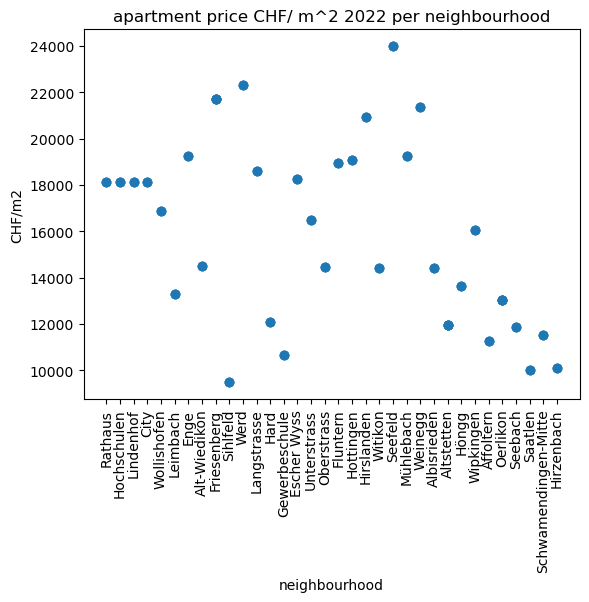

In [ ]:
plt.scatter(y=data_merged_2022['apartment_price_FrSqM_predicted_2022'], x=data_merged_2022['city_neighbourhood'])
plt.xticks(rotation=90)
#plt.tight_layout()
plt.ylabel('CHF/m2')
plt.xlabel('neighbourhood')
plt.title('apartment price CHF/ m^2 2022 per neighbourhood')
plt.show()

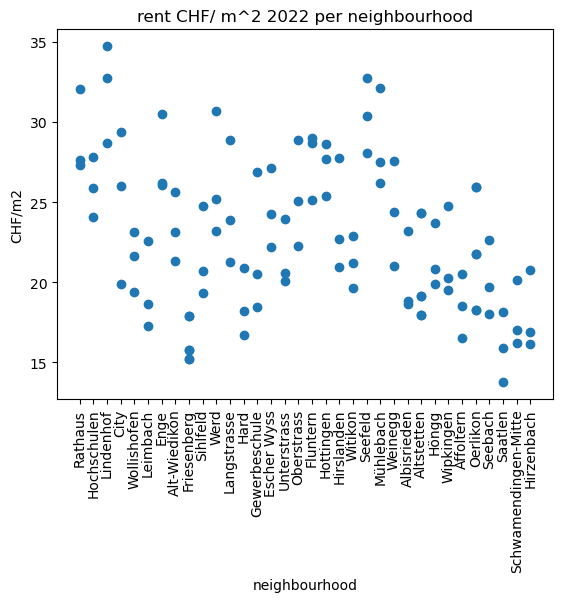

In [ ]:
plt.scatter(y=data_merged_2022['mean_rent'], x=data_merged_2022['city_neighbourhood'])
plt.xticks(rotation=90)
#plt.tight_layout()
plt.ylabel('CHF/m2')
plt.xlabel('neighbourhood')
plt.title('rent CHF/ m^2 2022 per neighbourhood')
plt.show()

In [ ]:
data_merged_2022

,degree_of_detail,number_rooms,community_apartment,mean_rent,median_rent,city_borough,rental_contract,city_neighbourhood,apartment_price_FrSqM_predicted_2022,zip_code,surface_m2,apartment_prices_2022,apartment_monthly_rents_2022,mortgage,monthly_mortgage_payment,minimal_yearly_gross_income
0,Quartiere,2,Alle Wohnungen,32.03,33.32,1,0,Rathaus,18127,8001,60,1087620,1921.80,870096,3432,123552
1,Quartiere,2,Alle Wohnungen,27.79,30.19,1,0,Hochschulen,18127,8001,60,1087620,1667.40,870096,3432,123552
2,Quartiere,2,Alle Wohnungen,34.72,37.11,1,0,Lindenhof,18127,8001,60,1087620,2083.20,870096,3432,123552
3,Quartiere,2,Alle Wohnungen,29.39,28.60,1,0,City,18127,8001,60,1087620,1763.40,870096,3432,123552
4,Quartiere,2,Alle Wohnungen,23.11,22.00,2,0,Wollishofen,16889,8038,60,1013340,1386.60,810672,3197,115092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Quartiere,3,Alle Wohnungen,21.78,21.56,11,0,Oerlikon,13022,8057,75,976650,1633.50,781320,3081,110916
107,Quartiere,4,Alle Wohnungen,18.29,17.97,11,0,Oerlikon,13022,8057,95,1237090,1737.55,989672,3903,140508
108,Quartiere,2,Alle Wohnungen,24.32,22.28,9,0,Altstetten,11966,8048,60,717960,1459.20,574368,2265,81540
109,Quartiere,3,Alle Wohnungen,19.17,17.69,9,0,Altstetten,11966,8048,75,897450,1437.75,717960,2831,101916


## Hypothesis Testing

In [ ]:
data_mean_rent = data_merged_2022.pivot_table(index=['city_neighbourhood'],values= ['mean_rent'], aggfunc = {'mean_rent':'mean'}).reset_index()
data_mean_rent['mean_rent'].mean()

23.059117647058823

We will test whether the monthly rent of all neighbourhoods is significantly different from the mean 23 FrSqm.

In [ ]:
# Your code here:
from scipy.stats import ttest_1samp

# alpha=0.05 (1-0.95) (p-value threshold, significance level)

# ** Two-sided test:
# Null hypothesis or H0: no difference in rent through city neighbourhoods = 23 FrSqm.
# Alternative hyp or H1: there is a difference in rent through city neighbourhoods <> 23 FrSqm.

side_test = 2
H0 = '=' #Put either '<=' or '>='
significance = 0.05

In [ ]:
#hour_worker = data_mean_rent['mean_rent']
stat, pval = ttest_1samp(data_mean_rent['mean_rent'], 30)
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

# report
print('stat: %0.3f, p_value: %0.3f' % (stat, pval))

if pval > significance:
   print ("p_value:", pval, ">",significance, "significance --> we have enough evidence to support H0 in a confidence level of", 1-significance)
else:
   print ("p_value:", pval, "<",significance, "significance --> we do not have enough evidence to support H0 in a confidence level of", 1-significance, ". We have to support H1.")

stat is   -10.019369013214826
pvalue for the two-tailed test is  1.5423566349940956e-11
stat: -10.019, p_value: 0.000
p_value: 1.5423566349940956e-11 < 0.05 significance --> we do not have enough evidence to support H0 in a confidence level of 0.95 . We have to support H1.


The Hypothesis testing showed that there is a difference in rent through city neighbourhoods. 